In [1]:
import numpy as np
import scipy as sp
import scipy.signal
import cv2 as cv

from matplotlib import pyplot as plt

%matplotlib inline

plt.rcParams['figure.dpi'] = 150

print("OpenCV Version: %s" % cv.__version__)

OpenCV Version: 4.1.0


In [2]:
def find_matches(template, image):
    matches = None
    template_keypoints = None
    template_desc = None
    image_keypoints = None
    image_desc = None
    
    orb = cv.ORB_create()
    
    template_keypoints, template_desc = orb.detectAndCompute(template, None)
    image_keypoints, image_desc = orb.detectAndCompute(image, None)
    
    matcher = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    
    matches = matcher.match(template_desc, image_desc)
#     matches = sorted(matcher, key=lambda x: x.distance)
    
    return template_keypoints, image_keypoints, matches[:10]

In [3]:
def draw_matches(template, template_keypoints, image, image_keypoints, matches):
    channels_number = 1
    
    if len(template.shape) == 3:
        channels_number = template.shape[2]
        
    margin = 10
    joined_image = np.zeros((max(template.shape[0], image.shape[0]),
                           template.shape[1] + image.shape[1] + margin, 3))
    
    if channels_number == 1:
        for channel in range(3):
            joined_image[:template.shape[0],
                         :template.shape[1],
                         channel] = template

            joined_image[:image.shape[0],
                         template.shape[1] + margin:,
                         channel] = image    
    else:
        joined_image[:template.shape[0], :template.shape[1]] = template
        joined_image[:image.shape[0], template.shape[1] + margin:] = image
        
    for match in matches:
        template_point = (int(template_keypoints[match.queryIdx].pt[0]),
                          int(template_keypoints[match.queryIdx].pt[1]))
        image_point = (int(image_keypoints[match.trainIdx].pt[0] + template.shape[1] + margin),
                       int(image_keypoints[match.trainIdx].pt[1]))
        
    cv.circle(joined_image, template_point, 5, (0, 0, 255), thickness = -1)
    cv.circle(joined_image, image_point, 5, (0, 255, 0), thickness = -1)
    cv.line(joined_image, template_point, image_point, (255, 0, 0), thickness = 3)
    
    return joined_image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


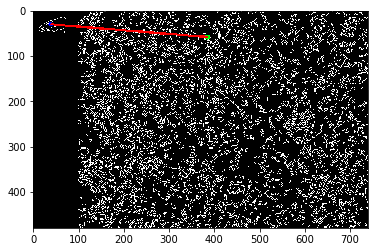

In [5]:
template = cv.imread('images/template.png', cv.IMREAD_GRAYSCALE)
image = cv.imread('images/aedes2.jpg', cv.IMREAD_GRAYSCALE)

# template = cv.medianBlur(template, 5)
template = cv.Canny(template, 100, 260)

image = cv.medianBlur(image, 1)
image = cv.Canny(image, 100, 260)

template_keypoints, image_keypoints, matches = find_matches(template, image)
output = draw_matches(template, template_keypoints, image, image_keypoints, matches)

# cv.imwrite('result/aedes_matches.jpg', output)
plt.imshow(output)